# ch06
데이터셋 다루는 법 연습

### 기본 

In [2]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)  ## 소수점 반올림하기 옵션

In [4]:
natural_numbers = [1,2,3,4,5,6,7,8,9,10]
## 정수 일반 list 생성

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(natural_numbers)
## 가지고 있는 list를 이용, tensor 생성
## from_tensor_slices(list명)
### ==> 리스트 객체 하나하나를 다 따로 텐서화

print(dataset)
# <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
type(dataset)
# tensorflow.python.data.ops.from_tensor_slices_op.TensorSliceDataset

In [6]:
for num in dataset:
  print(num)
  
## ds의 객체는 다 Tensor임

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


In [7]:
dataset2 = tf.data.Dataset.from_tensors(natural_numbers)
## tf.data.Dataset.from_tensors(list명)
### list이용, 리스트 통짜배기로 벡터화

for num in dataset2:
  print(num)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


In [8]:
for num in dataset.as_numpy_iterator():
  print(num)
# as_numpy_iterator()에 의해, 각각의 객체들이 다 iter화 됨.

1
2
3
4
5
6
7
8
9
10


In [9]:
for num in dataset.take(3):
  print(num)
# ds의 객체 중 3개만 가져와서 프린트

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [10]:
## filter + lambda식 이용
for num in dataset.filter(lambda x : 5<x):
  print(num)
  

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


In [11]:
for num in dataset.map(lambda x : x**2):
  print(num)
## dataset.map을 이용해서, map 내부 람다식의 내용 처럼 각각의 객체틀 변형

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)
tf.Tensor(100, shape=(), dtype=int32)


In [12]:
for num in dataset.shuffle(3):
  print(num)
## ds 섞기

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [13]:
for num in dataset.batch(3):
  print(num)
# 3개씩 묶어줌.

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)
tf.Tensor([10], shape=(1,), dtype=int32)


In [14]:
for num in dataset\
  .map(lambda x : x**2)\
  .filter(lambda x:5<x)\
  .shuffle(3).batch(3):
    print(num)

tf.Tensor([ 9 16 36], shape=(3,), dtype=int32)
tf.Tensor([25 49 64], shape=(3,), dtype=int32)
tf.Tensor([ 81 100], shape=(2,), dtype=int32)


In [15]:
## 1~100 자연수 리스트
## -1. 홀수만 선택
## -2. 랜덤섞기, 5개씩 50개 출력

NL = range(1,101)
for num in tf.data.Dataset.from_tensor_slices(NL).filter(lambda x : x%2==1).shuffle(10).batch(5):
  print(num)

tf.Tensor([ 5  9 15 19 13], shape=(5,), dtype=int32)
tf.Tensor([25 31  7 29  3], shape=(5,), dtype=int32)
tf.Tensor([37 27 35 43 33], shape=(5,), dtype=int32)
tf.Tensor([11 39 47 49 41], shape=(5,), dtype=int32)
tf.Tensor([ 1 17 61 21 57], shape=(5,), dtype=int32)
tf.Tensor([69 55 65 53 45], shape=(5,), dtype=int32)
tf.Tensor([73 67 59 77 71], shape=(5,), dtype=int32)
tf.Tensor([89 91 85 87 95], shape=(5,), dtype=int32)
tf.Tensor([97 99 83 63 81], shape=(5,), dtype=int32)
tf.Tensor([75 93 23 51 79], shape=(5,), dtype=int32)


### 기본 ds 사용

In [17]:
tensor_dataset_from_numpy = tf.data.Dataset.from_tensors(np.array([1,2,3]))
print(tensor_dataset_from_numpy)

<TensorDataset element_spec=TensorSpec(shape=(3,), dtype=tf.int32, name=None)>


In [21]:
for i in tensor_dataset_from_numpy:
  print(i)
  print(type(i))
type(tensor_dataset_from_numpy)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


tensorflow.python.data.ops.dataset_ops.TensorDataset

In [22]:
## 다차원
tensor_slice_dataset2 = tf.data.Dataset.from_tensor_slices(np.array([[1,2,3],[4,5,6],[7,8,9]]))

for i in tensor_slice_dataset2:
  print(i)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)


In [23]:
## fashion_minist 로드하기
train,test = tf.keras.datasets.fashion_mnist.load_data()
### ds가 애초에 train,test 로 저장되어 있군
Image,labels = train ## 각각의 ds 들은 이미지, 레이블 두개로 구성.

print(type(Image),Image.shape)
print(type(labels),labels.shape)

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)


### 이미지 데이터셋
0~9 숫자 이미지
훈련 6만, 테스트 1만

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

# 1
print("x_train.shape=", x_train.shape) # (60000, 28, 28)
print("y_train.shape=", y_train.shape) # (60000,)
print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
print("y_test.shape=",  y_test.shape)  # (10000,)

x_train.shape= (60000, 28, 28)
y_train.shape= (60000,)
x_test.shape= (10000, 28, 28)
y_test.shape= (10000,)


In [32]:
## nlabel, count 지정
nlabel,count = np.unique(y_train,return_counts=True)

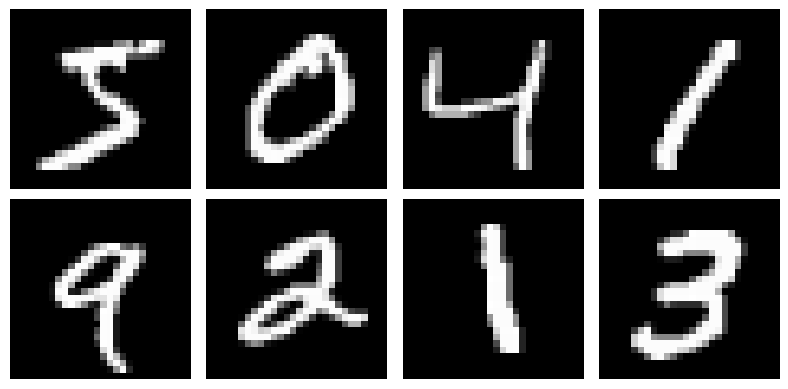

In [33]:
# 이미지 보이기
fig = plt.figure(figsize=(8,4))
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.axis("off")
fig.tight_layout()
plt.show()

In [ ]:
# 학습 데이터?


### 텍스트 데이터 전처리

In [24]:
import tensorflow as tf
butter = """
Smooth like butter/
Like a criminal undercover/
Gon' pop like trouble/
Breakin' into your heart like that/
Cool shade stunner/
Yeah, I owe it all to my mother/
Hot like summer/
Yeah, I'm makin' you sweat like that/
Break it down/
"""
butter = butter.split("/")
butter = [line.split() for line in butter]
## split() : 공백 기준 자르기 (단어 자르기)
butter

[['Smooth', 'like', 'butter'],
 ['Like', 'a', 'criminal', 'undercover'],
 ["Gon'", 'pop', 'like', 'trouble'],
 ["Breakin'", 'into', 'your', 'heart', 'like', 'that'],
 ['Cool', 'shade', 'stunner'],
 ['Yeah,', 'I', 'owe', 'it', 'all', 'to', 'my', 'mother'],
 ['Hot', 'like', 'summer'],
 ['Yeah,', "I'm", "makin'", 'you', 'sweat', 'like', 'that'],
 ['Break', 'it', 'down'],
 []]

In [26]:
# 단어장 만들어보기
tokenizer1 = tf.keras.preprocessing.text.Tokenizer()
## 토크나이저 생성
tokenizer1.fit_on_texts(butter)
## butter :: 각각의 단어들이 저장되어 있는 list
## 얘에 맞게 토큰 변형

## 1
print("1")
print(tokenizer1.index_docs)
print("2")
print(tokenizer1.index_word)
print("3")
print(tokenizer1.word_index)
print("4")
print(tokenizer1.word_docs)
print("5")
print(tokenizer1.word_counts)
print("6")
print(sorted(tokenizer1.word_counts.items()))



1
defaultdict(<class 'int'>, {5: 1, 1: 6, 6: 1, 9: 1, 8: 1, 7: 1, 12: 1, 11: 1, 10: 1, 15: 1, 2: 2, 14: 1, 16: 1, 13: 1, 19: 1, 18: 1, 17: 1, 24: 1, 22: 1, 3: 2, 21: 1, 20: 1, 25: 1, 23: 1, 4: 2, 27: 1, 26: 1, 31: 1, 30: 1, 29: 1, 28: 1, 32: 1, 33: 1})
2
{1: 'like', 2: 'that', 3: 'yeah,', 4: 'it', 5: 'smooth', 6: 'butter', 7: 'a', 8: 'criminal', 9: 'undercover', 10: "gon'", 11: 'pop', 12: 'trouble', 13: "breakin'", 14: 'into', 15: 'your', 16: 'heart', 17: 'cool', 18: 'shade', 19: 'stunner', 20: 'i', 21: 'owe', 22: 'all', 23: 'to', 24: 'my', 25: 'mother', 26: 'hot', 27: 'summer', 28: "i'm", 29: "makin'", 30: 'you', 31: 'sweat', 32: 'break', 33: 'down'}
3
{'like': 1, 'that': 2, 'yeah,': 3, 'it': 4, 'smooth': 5, 'butter': 6, 'a': 7, 'criminal': 8, 'undercover': 9, "gon'": 10, 'pop': 11, 'trouble': 12, "breakin'": 13, 'into': 14, 'your': 15, 'heart': 16, 'cool': 17, 'shade': 18, 'stunner': 19, 'i': 20, 'owe': 21, 'all': 22, 'to': 23, 'my': 24, 'mother': 25, 'hot': 26, 'summer': 27, "i'm": 

In [27]:
# butter 가사 숫자로 변경
encoded_butter = tokenizer1.texts_to_sequences(butter)
tokenizer1.texts_to_sequences(butter)

[[5, 1, 6],
 [1, 7, 8, 9],
 [10, 11, 1, 12],
 [13, 14, 15, 16, 1, 2],
 [17, 18, 19],
 [3, 20, 21, 4, 22, 23, 24, 25],
 [26, 1, 27],
 [3, 28, 29, 30, 31, 1, 2],
 [32, 4, 33],
 []]

In [28]:
tokenizer1 = tf.keras.preprocessing.text.Tokenizer(num_words=5,oov_token='<OOV>')
tokenizer1.fit_on_texts(butter)
print(tokenizer1.index_docs)
print(tokenizer1.index_word)
print(tokenizer1.word_index)

encoded_butter = tokenizer1.texts_to_sequences(butter)
encoded_butter

defaultdict(<class 'int'>, {6: 1, 2: 6, 7: 1, 10: 1, 9: 1, 8: 1, 13: 1, 12: 1, 11: 1, 16: 1, 3: 2, 15: 1, 17: 1, 14: 1, 20: 1, 19: 1, 18: 1, 25: 1, 23: 1, 4: 2, 22: 1, 21: 1, 26: 1, 24: 1, 5: 2, 28: 1, 27: 1, 32: 1, 31: 1, 30: 1, 29: 1, 33: 1, 34: 1})
{1: '<OOV>', 2: 'like', 3: 'that', 4: 'yeah,', 5: 'it', 6: 'smooth', 7: 'butter', 8: 'a', 9: 'criminal', 10: 'undercover', 11: "gon'", 12: 'pop', 13: 'trouble', 14: "breakin'", 15: 'into', 16: 'your', 17: 'heart', 18: 'cool', 19: 'shade', 20: 'stunner', 21: 'i', 22: 'owe', 23: 'all', 24: 'to', 25: 'my', 26: 'mother', 27: 'hot', 28: 'summer', 29: "i'm", 30: "makin'", 31: 'you', 32: 'sweat', 33: 'break', 34: 'down'}
{'<OOV>': 1, 'like': 2, 'that': 3, 'yeah,': 4, 'it': 5, 'smooth': 6, 'butter': 7, 'a': 8, 'criminal': 9, 'undercover': 10, "gon'": 11, 'pop': 12, 'trouble': 13, "breakin'": 14, 'into': 15, 'your': 16, 'heart': 17, 'cool': 18, 'shade': 19, 'stunner': 20, 'i': 21, 'owe': 22, 'all': 23, 'to': 24, 'my': 25, 'mother': 26, 'hot': 27, 

[[1, 2, 1],
 [2, 1, 1, 1],
 [1, 1, 2, 1],
 [1, 1, 1, 1, 2, 3],
 [1, 1, 1],
 [4, 1, 1, 1, 1, 1, 1, 1],
 [1, 2, 1],
 [4, 1, 1, 1, 1, 2, 3],
 [1, 1, 1],
 []]

In [ ]:
# 문장 길이 일치시켜보기 * 28*28
from tensorflow.keras.preprocessing.sequence import pad_sequences